# Perceptions&Interactions TP2 - Traitement d'image

## Introduction

*Imports*

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

**(Rappel) Chargement d'une image avec OpenCV et affichage avec Matplotlib**

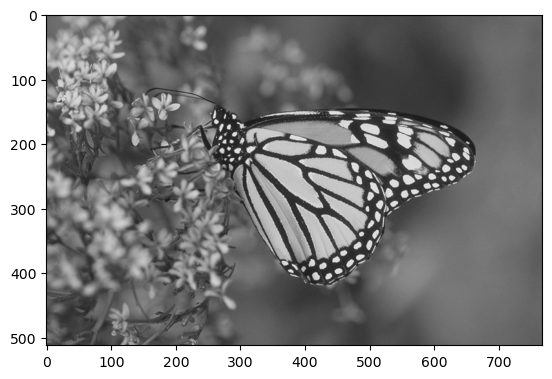

In [92]:
img = cv2.imread("butterfly_gray.png")
plt.imshow(img)
plt.show()

**Format des données d'une image**

Une image est constituée de 3 dimensions, qui sont ici respectivement la hauteur, la longueur et les trois canaux de couleur (Rouge, Vert, Bleu).

Accéder à l'attribut `shape` d'une image permet d'obtenir un tuple contenant la taille de chacune des dimensions de l'image.

In [93]:
print("Taille de l'image :", img.shape)

(h, w, c) = img.shape
print("Hauteur :", h)
print("Largeur :", w)
print("Nombre de canaux de couleur :", c)
# ou
print("Hauteur (v2) :", img.shape[0])
print("Largeur (v2) :", img.shape[1])
print("Nombre de canaux de couleur (v2) :", img.shape[2])

Taille de l'image : (512, 768, 3)
Hauteur : 512
Largeur : 768
Nombre de canaux de couleur : 3
Hauteur (v2) : 512
Largeur (v2) : 768
Nombre de canaux de couleur (v2) : 3


**Obtenir la valeur maximale d'une image**

In [94]:
# %%time
# def max_value_image(img):
#     val_max = 0
#     for x in range(img.shape[0]):
#         for y in range(img.shape[1]):
#             for c in range(img.shape[2]):
#                 if img[x, y, c] > val_max:
#                     val_max = img[x, y, c]
#     return val_max

# print("Intensité maximale de l'image :", max_value_image(img))

ou

In [95]:
%%time
print("Valeur maximale de l'image (numpy) :", np.max(img))

Valeur maximale de l'image (numpy) : 244
CPU times: user 240 µs, sys: 3 µs, total: 243 µs
Wall time: 172 µs


**Obtenir la valeur moyenne d'une image**

In [96]:
def mean_value_image_v1(img):
    val_sum = 0
    nb_values = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            for c in range(img.shape[2]):
                val_sum += img[x, y, c]
                nb_values += 1
    return val_sum / nb_values

print("Intensité moyenne de l'image (v1) :", mean_value_image_v1(img))

Intensité moyenne de l'image (v1) : 105.5275395711263


ou

In [97]:
def mean_value_image_v2(img):
    val_sum = np.sum(img)
    nb_values = img.shape[0] * img.shape[1] * img.shape[2]
    return val_sum / nb_values

print("Intensité moyenne de l'image (v2) :", mean_value_image_v2(img))

Intensité moyenne de l'image (v2) : 105.5275395711263


ou

In [98]:
print("Intensité moyenne de l'image (numpy) :", np.mean(img))

Intensité moyenne de l'image (numpy) : 105.5275395711263


**Autres fonctions numpy utiles**

`np.zeros((k1, k2, k3, ..., kN))` permet de créer un tableau à N dimensions de tailles k1, k2, k3, ..., kN rempli entièrement de 0s. Il est également possible de lui donner comme paramètre la *shape* d'un autre tableau pour copier ses dimensions.

`np.ones((k1, k2, k3, ..., kN))` fait de même, mais avec des 1 à la place des 0.

`np.arange(k)` permet de créer un tableau \[0, 1, 2, ..., k-1, k\]. De la même manière, `np.arange(a, b)` permet de créer un tableau \[a, a+1, a+2, ..., b-1, b\].

In [99]:
example = np.zeros((10))
print("Exemple 1 :", example)
print("Shape exemple 1 :", example.shape)
example = np.zeros((2, 2, 3))
print("Shape exemple 2 :", example.shape)
example = np.zeros(img.shape)
print("Shape exemple 3 :", example.shape)

print()

example = np.ones((10))
print("Exemple 4 :", example)
print("Shape exemple 4 :", example.shape)

print()

example = np.arange(10)
print("Exemple 5 :", example)
example = np.arange(3, 10)
print("Exemple 6 :", example)

Exemple 1 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape exemple 1 : (10,)
Shape exemple 2 : (2, 2, 3)
Shape exemple 3 : (512, 768, 3)

Exemple 4 : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Shape exemple 4 : (10,)

Exemple 5 : [0 1 2 3 4 5 6 7 8 9]
Exemple 6 : [3 4 5 6 7 8 9]


## À vous

### **1. Histogramme d'intensité**

Codez la fonction histogram qui calcule l'histogramme d'intensité d'une image en niveaux de gris et affichez-le. L'histogramme d'intensité d'une image peut être vu comme un tableau à une dimension dont chaque case contient le nombre de pixels à une certaine valeur d'intensité.

Après avoir codé la fonction, décommentez la dernière ligne pour afficher l'histogramme sous forme de barres. Vous pouvez trouver un exemple de résultat attendu dans `results/histogramme.png`.

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 6.0000e+00 3.0000e+00 3.0000e+00
 2.4000e+01 3.3000e+01 1.0500e+02 1.9200e+02 6.5700e+02 5.8500e+02
 5.7300e+02 7.8600e+02 9.0000e+02 1.0860e+03 1.3020e+03 9.3900e+02
 9.8400e+02 1.1820e+03 1.4940e+03 1.8060e+03 1.8120e+03 1.6320e+03
 2.5020e+03 3.5250e+03 3.6810e+03 3.2010e+03 4.1550e+03 3.7050e+03
 6.4890e+03 6.2520e+03 4.0800e+03 4.7400e+03 7.5900e+03 8.2980e+03
 7.0740e+03 9.7800e+03 1.3689e+04 9.2370e+03 1.3413e+04 1.2756e+04
 1.1226e+04 7.0230e+03 6.9720e+03 9.3180e+03 9.1530e+03 9.3840e+03
 6.0120e+03 7.7820e+03 9.2550e+03 9.3870e+03 9.0480e+03 8.9970e+03
 1.2111e+04 1.3356e+04 1.2726e+04 1.4184e+04 1.2969e+04 1.0740e+04
 1.1004e+04 1.0194e+04 1.1304e+04 9.8190e+03 9.6300e+03 9.4470e+03
 1.2201e+04 1.0290e+04 1.1568e+04 1.1904e+04 9.1230e+03 1.0146

<BarContainer object of 256 artists>

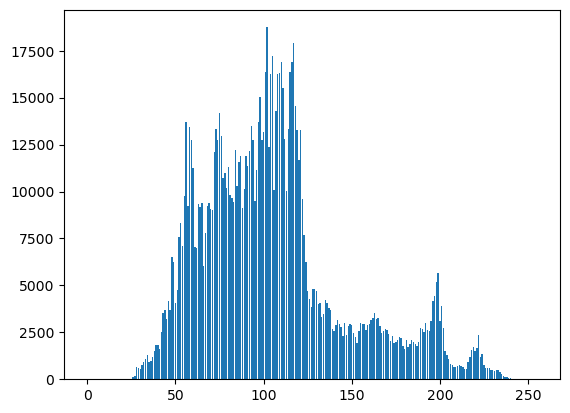

In [100]:
def histogram(img):
    hist = np.zeros(256)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            for c in range(img.shape[2]):
                hist[img[x, y, c]] += 1
    return hist

hist = histogram(img)
print(hist)
plt.bar(np.arange(len(hist)), hist)

### **2. Normalisation**

Codez la fonction normalize. Cette fonction a pour effet de réduire ou d'augmenter le contraste, respectivement en comprimant ou en étirant les valeurs d'intensité de l'image d'entrée vers les valeurs val_min et val_max. Faites attention aux types (uint8, float...), leur déclaration étant implicite en Python.

Affichez l'image après normalisation avec val_min = 100 et val_max = 125. Vous pouvez trouver un exemple de résultat attendu dans `results/butterfly_normalized.png`.

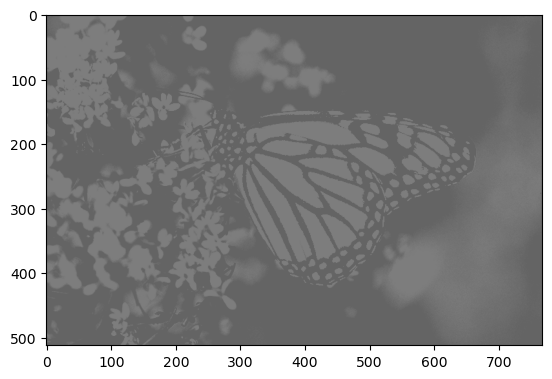

In [101]:
def normalize(img, val_min, val_max):
    img_copy = img.copy()
    for x in range(img_copy.shape[0]):
        for y in range(img_copy.shape[1]):
            for c in range(img_copy.shape[2]):
                if(img_copy[x, y, c] < val_min):
                    img_copy[x, y, c] = val_min
                elif(img_copy[x, y, c] > val_max):
                    img_copy[x, y, c] = val_max
    return img_copy

img_normalized = normalize(img, 100, 125)
plt.imshow(img_normalized)

#### **Relation entre histogramme et normalisation**

Affichez à nouveau l'histogramme, cette fois-ci sur l'image normalisée, et constatez les changements. Vous pouvez essayer de modifier les val_min et val_max de la fonction normalize puis d'afficher à nouveau l'histogramme. Qu'en concluez-vous ?

<BarContainer object of 256 artists>

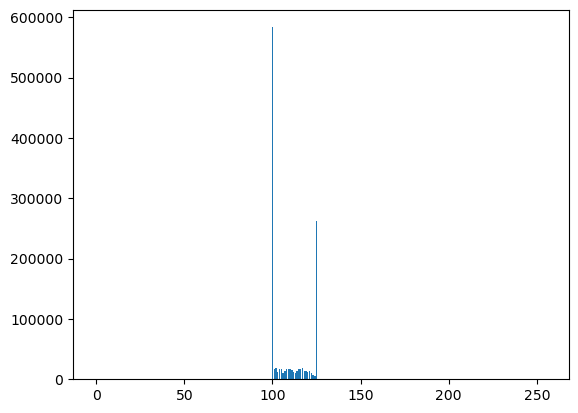

In [102]:
val_min = 100
val_max = 125

img_normalized = normalize(img, val_min, val_max)
hist = histogram(img_normalized)
plt.bar(np.arange(len(hist)), hist)

### **3. Débruitage et convolution**

Dû à un problème sur l'objectif de la caméra, l'image du papillon s'est retrouvée recouverte de bruit !

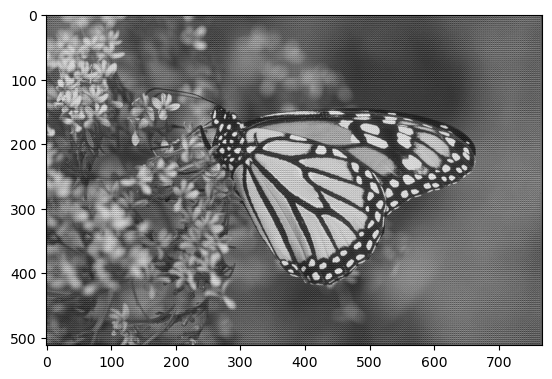

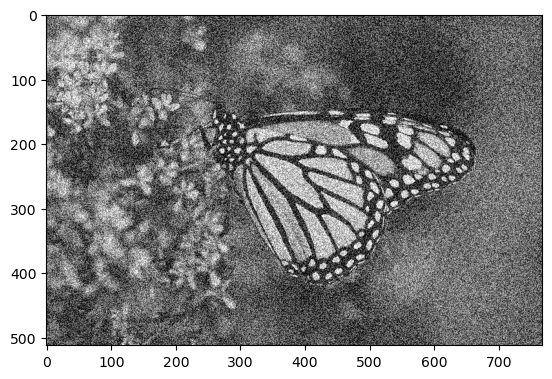

In [103]:
img_bruitee = cv2.imread("butterfly_noise_local.png")
plt.imshow(img_bruitee)
plt.show()

img_bruitee_white = cv2.imread("butterfly_noise_white.png")
plt.imshow(img_bruitee_white)
plt.show()

Heureusement, le bruit affectant l'image semble s'annuler localement (il a une moyenne de 0), il est donc possible de s'approcher de l'image originale en prenant pour chaque pixel la moyenne de lui-même et de chacun de ses voisins.

#### 3.1 Moyenne des voisins
Écrivez une fonction `moyenne_voisins` qui crée une nouvelle image, dans laquelle chaque pixel est égal à la moyenne de ses voisins de l'image originale. Vous considérerez un voisinage de taille 1, c'est-à-dire pour un pixel (i, j) tous les pixels de i-1 à i+1 et de j-1 à j+1. Affichez ensuite cette image. Vous pouvez trouver un exemple de résultat dans `resultats/butterfly_denoised_local.png`.

Notes : Les bords des images seront ignorés. Cette fois encore, faites attention aux types (uint8, float...).

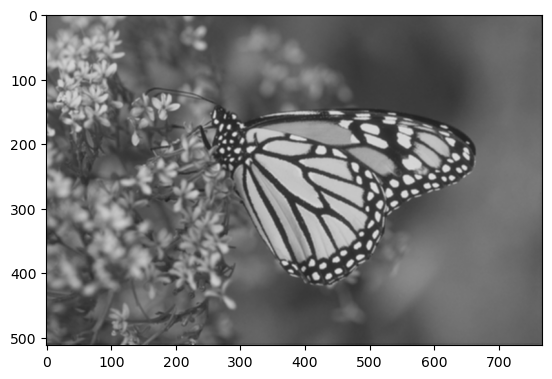

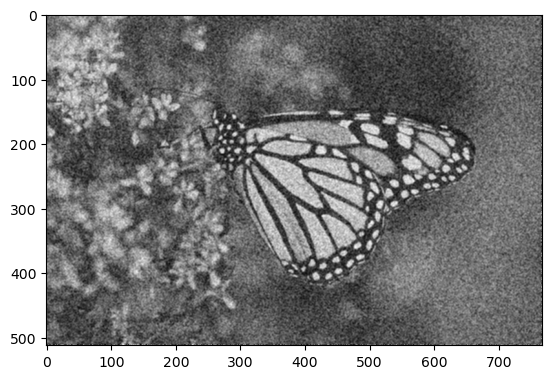

In [104]:
def moyenne_voisins(img):
    img = img.astype('float32')
    img_bruitee = img.copy()
    for x in range(1, img.shape[0]-1):
        for y in range(1, img.shape[1]-1):
            for c in range(img.shape[2]):
                img_bruitee[x, y, c] = (img[x - 1, y - 1, c] + img[x - 1, y, c] + img[x - 1, y + 1, c] +
                                          img[x, y - 1, c] + img[x, y, c] + img[x, y + 1, c] +
                                          img[x + 1, y - 1, c] + img[x + 1, y, c] + img[x + 1, y + 1, c]) / 9    
    return img_bruitee.astype('uint8')

img_debruitee = moyenne_voisins(img_bruitee)
img_debruitee_white = moyenne_voisins(img_bruitee_white)
plt.imshow(img_debruitee)
plt.show()
plt.imshow(img_debruitee_white)
plt.show()

Observez le résultat. Qu'en concluez-vous sur l'opération effectuée ?
Appliquez la même fonction sur l'image `butterfly_noise_white.png`. Qu'en concluez-vous ?

#### 3.2 Voisinage de taille variable
Écrivez une nouvelle fonction moyenne_voisins_hs(img, half_size) pour laquelle la taille du voisinage est donnée par `half_size`. Testez cette fonction avec un `half_size` de 1, 2, 4, 8.

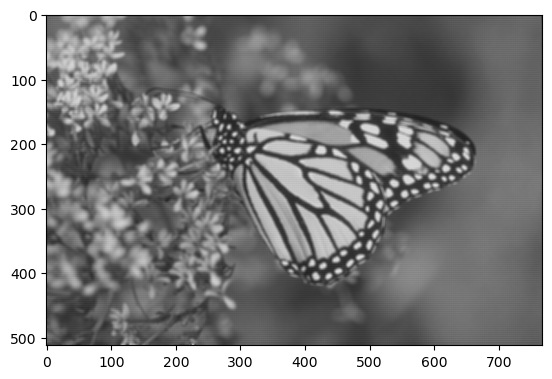

In [111]:
def moyenne_voisins_hs(img, half_size):
    img = img.astype('float32')
    img_bruitee_hs = img.copy()
    for x in range(half_size, img.shape[0]-half_size):
        for y in range(half_size, img.shape[1]-half_size):
            for c in range(img.shape[2]):
                sum = 0
                count = 0
                for dx in range(-half_size, half_size+1):
                    for dy in range(-half_size, half_size+1):
                        if 0 <= x+dx < img.shape[0] and 0 <= y+dy < img.shape[1]:
                            sum += img[x+dx, y+dy, c]
                            count += 1
                img_bruitee_hs[x, y, c] = sum / count
    return img_bruitee_hs.astype('uint8')

half_size = 2
img_debruitee_hs = moyenne_voisins_hs(img_bruitee, half_size)
plt.imshow(img_debruitee_hs)

#### 3.3 Voisinage par convolution
Écrivez une nouvelle fonction moyenne_voisins_convolution(img, noyau). `noyau` est une matrice carrée, de taille `half_size`\*2+1, dont les valeurs sont binaires (0 ou 1). Pour chaque pixel (i, j) de `img`, considérez `noyau` comme étant centré en (i, j). Pour chaque pixel du voisinage, une valeur de `noyau` de 1 indique que le pixel à cette position doit être pris en compte dans le calcul, et une valeur de 0 indique qu'il doit être ignoré. Dans un premier temps, utilisez un noyau composé entièrement de 1s. Encore une fois, testez cette fonction avec un `half_size` de 1, 2, 4, 8.

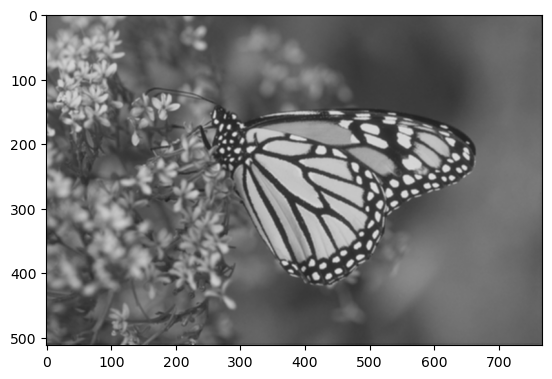

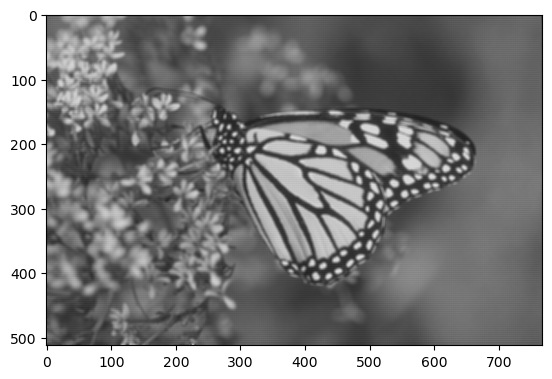

In [113]:
def moyenne_voisins_convolution(img, noyau):
    img = img.astype('float32')
    img_bruitee = img.copy()
    rayon = 1
    for x in range(half_size, img.shape[0]-half_size):
        for y in range(half_size, img.shape[1]-half_size):
            for c in range(img.shape[2]):
                sum = 0
                count = 0
                if(noyau[0, 0] == 1):
                    for dx in range(-half_size, half_size+1):
                        for dy in range(-half_size, half_size+1):
                            if 0 <= x+dx < img.shape[0] and 0 <= y+dy < img.shape[1]:
                                sum += img[x+dx, y+dy, c]
                                count += 1
                    img_bruitee[x, y, c] = sum / count
    return img_bruitee.astype('uint8')


half_size = 1
size = half_size * 2 + 1
noyau = np.ones((size, size))
img_debruitee_conv = moyenne_voisins_convolution(img_bruitee, noyau)
plt.imshow(img_debruitee_conv)
plt.show()
half_size = 2
size = half_size * 2 + 1
noyau = np.ones((size, size))
img_debruitee_conv = moyenne_voisins_convolution(img_bruitee, noyau)
plt.imshow(img_debruitee_conv)
plt.show()

Félicitations, vous avez codé une convolution ! Pour aller plus loin, vous pouvez jouer avec la taille, mais aussi le contenu de ce noyau.